# **Wiktor Ciołek LSED lab9 17.06.2024**

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay

plt.rcParams['font.size'] = 18

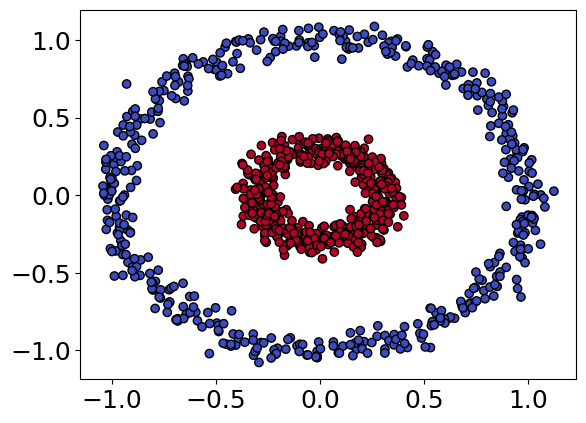

In [37]:
from sklearn.datasets import make_circles

data, target = make_circles(n_samples=1_000, factor = 0.3, noise = 0.05)

plt.scatter(data[:,0], data[:,1], c = target, cmap=plt.cm.coolwarm, edgecolors='k')

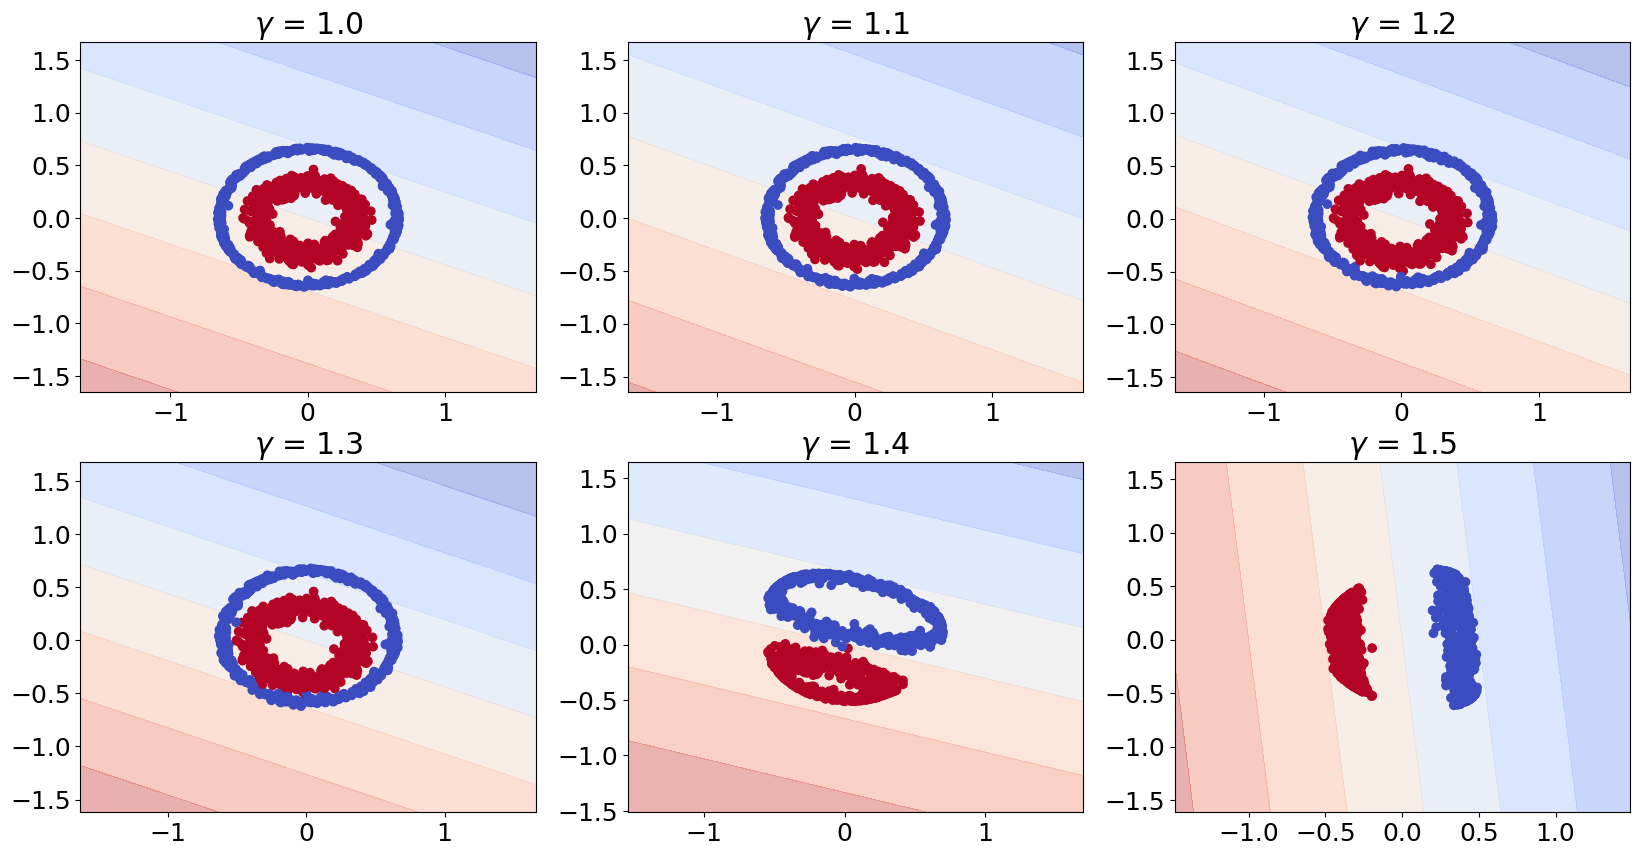

In [40]:
from sklearn.decomposition import KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))

gammas = np.linspace(1, 1.5, 6)

for i, g in enumerate(gammas):
    axx = ax[i//3][i%3]
    kernel_pca = KernelPCA(n_components=None, kernel="rbf", gamma=g)

    data_kpca = kernel_pca.fit_transform(data)

    lda = LinearDiscriminantAnalysis().fit(data_kpca[:, :2], target)
    DecisionBoundaryDisplay.from_estimator(lda, data_kpca[:, :2], cmap=plt.cm.coolwarm, alpha=0.4, ax=axx)
    axx.scatter(data_kpca[:, 0], data_kpca[:, 1], c = target, cmap=plt.cm.coolwarm)
    axx.set_title(fr"$\gamma$ = {g}")

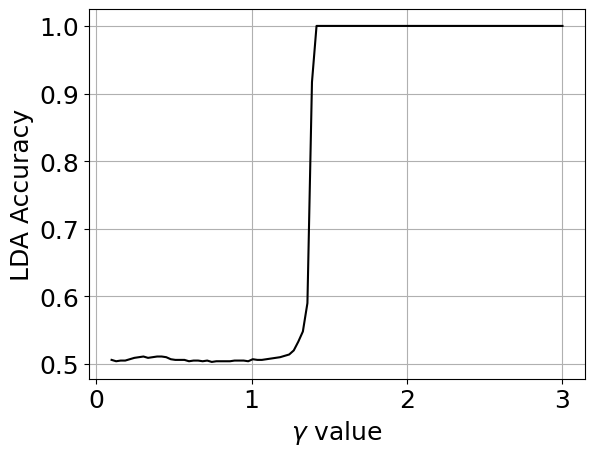

In [49]:
gammas = np.linspace(0.1, 3, 100)

accs = []
for i, g in enumerate(gammas):
    kernel_pca = KernelPCA(n_components=None, kernel="rbf", gamma=g)
    data_kpca = kernel_pca.fit_transform(data)
    lda = LinearDiscriminantAnalysis().fit(data_kpca[:, :2], target)
    accs.append(lda.score(data_kpca[:, :2], target))

plt.plot(gammas, accs, 'k-')
plt.xlabel(rf"$\gamma$ value")
plt.ylabel('LDA Accuracy')
plt.grid()